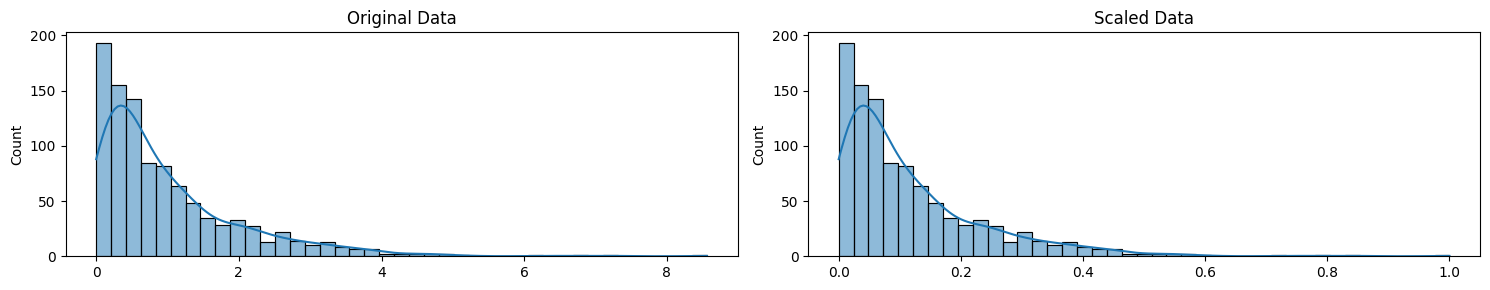

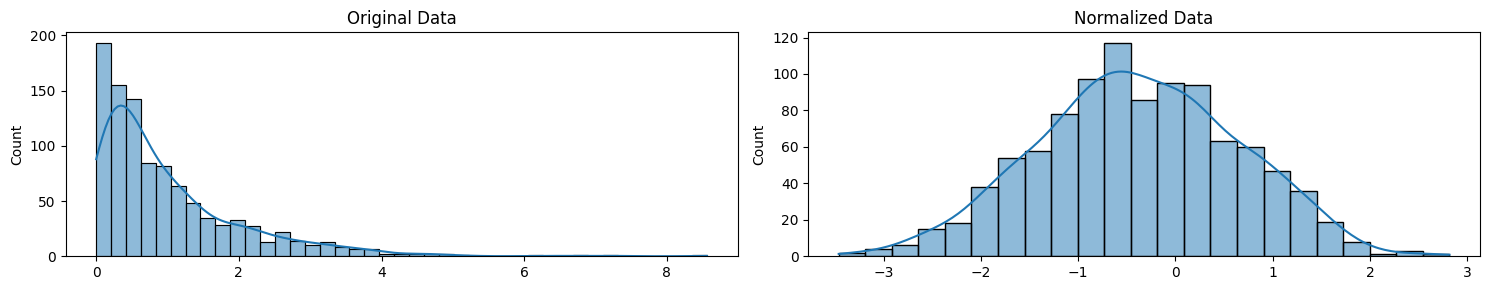

In [1]:
import pandas as pd
import numpy as np

# for box-cox transformation
from scipy import stats

# for scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# %% [markdown]
# ### 1. Set Up Environment

# set seed for reproducibility
np.random.seed(0)

# %% [markdown]
# ### 2. Generate Data Points
original_data = np.random.exponential(size=1000)

# %% [markdown]
# ### 3. Min-Max Scaling
# Scaling allows the machine to use the data properly.
# Recognizing which values are more important or less important.
# Basically standardizing units.
scaled_data = minmax_scaling(original_data, columns=0)

# plot everything
fig, ax = plt.subplots(1, 2, figsize=(15,3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled Data")
fig.tight_layout()
plt.show()

# %% [markdown]
# ### 4. Normalize Data with Box-Cox Transformation
# Normalization prevents outliers from dominating the dataset.
# Useful when outliers dominate & the actual dataset has a normal distribution.
# Box-Cox requires strictly positive data, so we add a small offset.
normalized_data = stats.boxcox(original_data + 1e-9)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized Data")
fig.tight_layout()
plt.show()

# %% [markdown]
# ### 5. Save Processed Data (Optional)
pd.DataFrame({'original': original_data, 'scaled': scaled_data.flatten(), 'normalized': normalized_data[0]}).to_csv('cleaned_data.csv', index=False)
